### 【 QQ Plot - 정규성/왜도/첨도 체크 】

- 정규분포 가정이 필요한 모델에서 필수:
    * 선형회귀(OLS)  : 잔차가 정규인지 확인
    * ANOVA, t-test : 데이터 정규성
    * Box-Cox 변환 필요 여부 판단
    * 치우침 개선 전·후 비교
    * 이상치(outlier) 탐지

- 무슨 변환을 해야 하는지 방향성도 잡아줌

In [1]:
## 모듈 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox, yeojohnson          ## 왜도/첨도 변환 함수
import koreanize_matplotlib
from scipy.stats import probplot                    ## qqplot 그려주는 함수

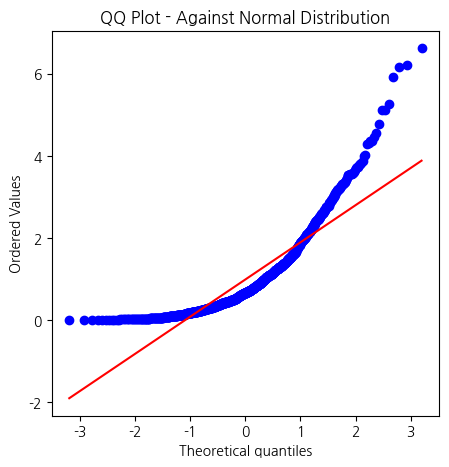

In [2]:
## 임시데이터 - 왼쪽 쏠린 데이터
x = np.random.exponential(size=1000)

plt.figure(figsize=(5,5))

## qqplot
probplot(x, dist="norm", plot=plt)

plt.title("QQ Plot - Against Normal Distribution")
plt.show()